In [1]:
#Importing all packages for the analysis
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import numpy as np
#conda install -c glemaitre imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [2]:
#Importing the Excel file

df = pd.ExcelFile("C:/Users/Jad/Desktop/All Files/Machine Learning/The project/DMML_Project_Dataset.xlsx")

SD_df =pd.read_excel(df,'Soc_Dem')

#Products owned + actual volumes
PAB_data =pd.read_excel(df,'Products_ActBalance')

#Inflow/outflow on C/A, aggregated card turnover
IOF_data =pd.read_excel(df,'Inflow_Outflow')

#For 60 % of clients actual sales + revenues from these are available
data_final1 =pd.read_excel(df,'Sales_Revenues')

# How are we going to analyse all this data ? 

#  I. The data set 

All our data is splitted into multiple tables. Therefore we have to merge all these tables in order to have a clear view of the information available for each client.

In [3]:
data_SD=pd.merge(data_final1,SD_df, on="Client",how='left')
data_SDPAB=pd.merge(data_SD,PAB_data,on="Client",how='left')
data_final=pd.merge(data_SDPAB, IOF_data,on="Client",how="left")
data_final

,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,1094,0,1,0,0.000000,5.138571,0.000000,M,25,8,...,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0
1,1484,1,0,1,25.609107,0.000000,8.722500,M,39,0,...,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0
2,20,0,1,0,0.000000,3.822500,0.000000,M,27,181,...,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0
3,1193,0,0,0,0.000000,0.000000,0.000000,M,48,16,...,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0
4,142,0,0,0,0.000000,0.000000,0.000000,F,27,183,...,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0
5,865,0,0,1,0.000000,0.000000,7.535714,M,23,26,...,441.464286,441.464286,214.285714,14.285714,203.428571,12.0,12.0,3.0,1.0,5.0
6,672,0,1,0,0.000000,1.964286,0.000000,M,4,261,...,291.832143,291.832143,0.000000,0.000000,0.000000,2.0,2.0,0.0,0.0,0.0
7,942,0,1,0,0.000000,36.785714,0.000000,M,40,76,...,173.928571,173.928571,0.000000,0.000000,173.500000,4.0,4.0,0.0,0.0,3.0
8,184,0,1,0,0.000000,5.785714,0.000000,F,30,115,...,131.874286,131.874286,0.000000,129.343214,0.000000,4.0,4.0,0.0,2.0,0.0
9,1513,0,0,1,0.000000,0.000000,13.315714,F,87,149,...,26.000000,26.000000,0.000000,26.000000,0.000000,2.0,2.0,0.0,2.0,0.0


In [4]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 968
Data columns (total 36 columns):
Client                          969 non-null int64
Sale_MF                         969 non-null int64
Sale_CC                         969 non-null int64
Sale_CL                         969 non-null int64
Revenue_MF                      969 non-null float64
Revenue_CC                      969 non-null float64
Revenue_CL                      969 non-null float64
Sex                             967 non-null object
Age                             969 non-null int64
Tenure                          969 non-null int64
Count_CA                        969 non-null int64
Count_SA                        265 non-null float64
Count_MF                        184 non-null float64
Count_OVD                       251 non-null float64
Count_CC                        110 non-null float64
Count_CL                        79 non-null float64
ActBal_CA                       969 non-null float64
ActBal_SA 

We now have our data set, with all the information that we have about the clients. How many customers do we have in our data set? 

In [5]:
print('We have', len(data_final), "observations or clients in our data set. Cool ! ")

We have 969 observations or clients in our data set. Cool ! 


# II. Exploratory analysis

Let's find out what our data set has to offer !

In [6]:
data_final.loc[:,"Sale_MF":"Revenue_CL"].describe()

,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,0.199174,0.249742,0.299278,1.925015,2.712827,3.604220
std,0.399586,0.433087,0.458178,9.943601,17.693433,7.743618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,4.642857
max,1.000000,1.000000,1.000000,220.488214,407.962500,133.275357


In [7]:
data_final.loc[:,"Age": "ActBal_CL"].describe()

,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
count,969.000000,969.000000,969.000000,265.000000,184.000000,251.0,110.0,79.000000,969.000000,265.000000,184.000000,251.000000,110.000000,79.000000
mean,42.983488,100.393189,1.075335,1.181132,5.179348,1.0,1.0,1.113924,2493.026329,14427.773550,21250.471671,147.294607,280.908494,3952.655140
std,18.578951,65.437097,0.323815,0.457702,9.354897,0.0,0.0,0.319749,6268.027982,32615.370810,77683.063992,323.162968,376.194964,3888.046341
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,-15.479286,63.803214
25%,29.000000,42.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,73.135000,725.631429,0.000000,0.000000,0.767857,1085.637679
50%,41.000000,95.000000,1.000000,1.000000,2.000000,1.0,1.0,1.000000,536.951429,4352.067857,1953.776429,0.000000,37.125000,2906.981786
75%,57.000000,151.000000,1.000000,1.000000,5.000000,1.0,1.0,1.000000,2262.178929,13326.190357,11241.016339,122.903393,491.310179,5315.682321
max,90.000000,271.000000,4.000000,3.000000,79.000000,1.0,1.0,2.000000,74934.956071,389883.830714,761235.504286,2055.325357,1767.785357,17300.489643


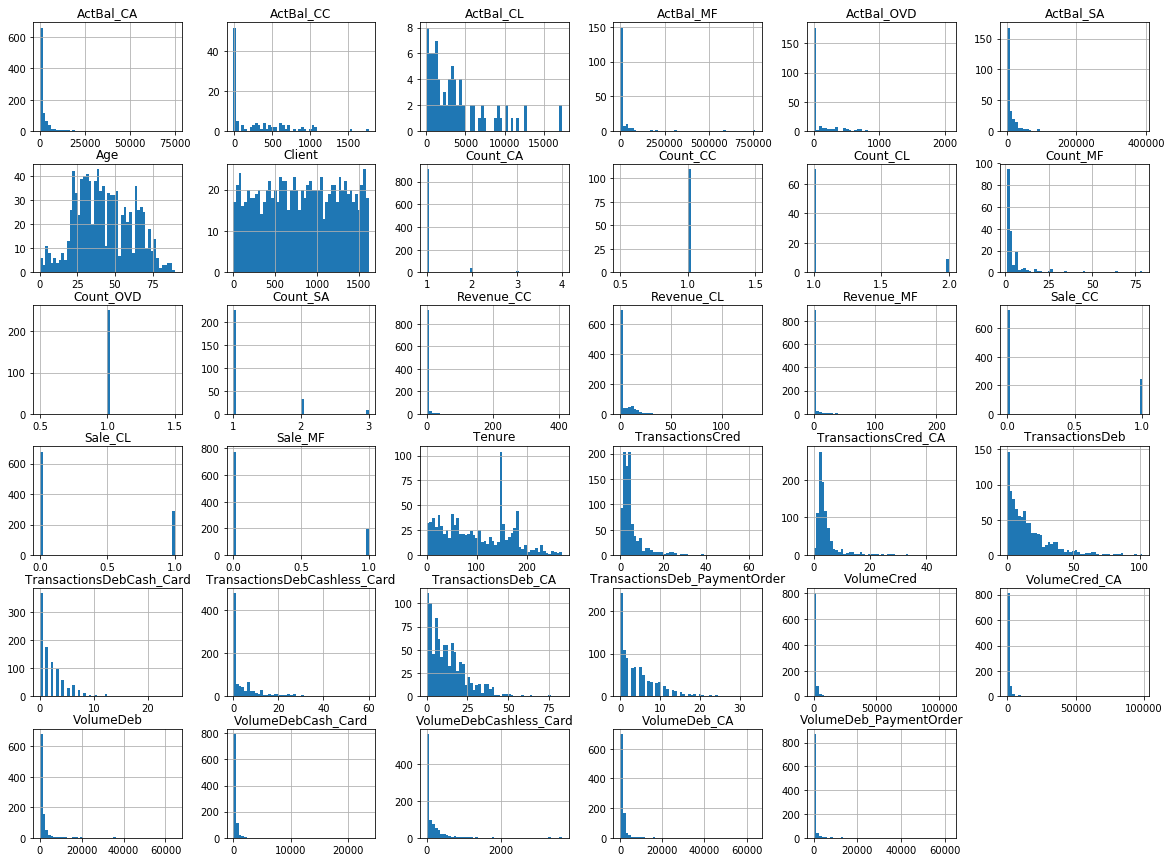

In [8]:
data_final.hist(bins=50, figsize=(20,15))
plt.show()

One of the first things we observe is the absence of age for some observations. As we mentioned in our report, the minimum age is zero, which is impossible.

# Dirty Modeling

We will try multiple models to have a an idea about which model will fit the most.

First, we should handle the missing observations. We can see that there exist two missing observations in "Sex" and multiple missing values in other columns. We will first replace these missing values with the value zero. We will test other options later to see what impacts most on the accuracy of our models.

In [9]:
data_final.isna().sum()

Client                            0
Sale_MF                           0
Sale_CC                           0
Sale_CL                           0
Revenue_MF                        0
Revenue_CC                        0
Revenue_CL                        0
Sex                               2
Age                               0
Tenure                            0
Count_CA                          0
Count_SA                        704
Count_MF                        785
Count_OVD                       718
Count_CC                        859
Count_CL                        890
ActBal_CA                         0
ActBal_SA                       704
ActBal_MF                       785
ActBal_OVD                      718
ActBal_CC                       859
ActBal_CL                       890
VolumeCred                       18
VolumeCred_CA                    18
TransactionsCred                 18
TransactionsCred_CA              18
VolumeDeb                        18
VolumeDeb_CA                

In [10]:
Dirty_M_data = data_final.fillna(0)

In [11]:
Dirty_M_data.isna().sum()

Client                          0
Sale_MF                         0
Sale_CC                         0
Sale_CL                         0
Revenue_MF                      0
Revenue_CC                      0
Revenue_CL                      0
Sex                             0
Age                             0
Tenure                          0
Count_CA                        0
Count_SA                        0
Count_MF                        0
Count_OVD                       0
Count_CC                        0
Count_CL                        0
ActBal_CA                       0
ActBal_SA                       0
ActBal_MF                       0
ActBal_OVD                      0
ActBal_CC                       0
ActBal_CL                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashl

In [12]:
Dirty_M_data["Sex"] = Dirty_M_data["Sex"].replace("M",0)
Dirty_M_data["Sex"] = Dirty_M_data["Sex"].replace("F",1)

In [13]:
X = Dirty_M_data.loc[:,['Client','Age','Tenure','ActBal_CA','VolumeCred','VolumeCred_CA','TransactionsCred',
                             'TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','VolumeDebCash_Card',
                             'VolumeDeb_PaymentOrder','TransactionsDeb','TransactionsDeb_CA','TransactionsDebCash_Card',
                             'TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder']] 
Y = Dirty_M_data["Sale_CL"]
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state=2)

### Logistic Regression

In [14]:
log_reg = LogisticRegression(random_state=0, max_iter = 5000)
log_reg.fit(train_X,train_Y)
print(classification_report(test_Y,log_reg.predict(test_X)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       152
           1       0.62      0.36      0.45        42

    accuracy                           0.81       194
   macro avg       0.73      0.65      0.67       194
weighted avg       0.79      0.81      0.79       194



### Random Forest

In [15]:
X, Y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
Dirty_RF = RandomForestClassifier(max_depth=5, random_state=1)
Dirty_RF.fit(train_X,train_Y)
print(classification_report(test_Y,Dirty_RF.predict(test_X)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       152
           1       0.73      0.19      0.30        42

    accuracy                           0.81       194
   macro avg       0.77      0.59      0.60       194
weighted avg       0.80      0.81      0.76       194



### Nearest Neighbour

In [16]:
CL_NBclass=KNeighborsClassifier(n_neighbors=9)
CL_NBclass.fit(train_X,train_Y) 
print(classification_report(test_Y,CL_NBclass.predict(test_X)))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       152
           1       0.27      0.10      0.14        42

    accuracy                           0.75       194
   macro avg       0.53      0.51      0.50       194
weighted avg       0.67      0.75      0.70       194



### Support Vector Machine

In [17]:
clf = svm.SVC()
clf.fit(train_X, train_Y)
print(classification_report(test_Y,clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       152
           1       1.00      0.02      0.05        42

    accuracy                           0.79       194
   macro avg       0.89      0.51      0.46       194
weighted avg       0.83      0.79      0.70       194



### Stochastic Gradient Descent

In [18]:
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=650)
SGD.fit(train_X, train_Y)
print(classification_report(test_Y,SGD.predict(test_X)))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       152
           1       0.12      0.02      0.04        42

    accuracy                           0.75       194
   macro avg       0.45      0.49      0.45       194
weighted avg       0.64      0.75      0.68       194



### Naive Bayes

In [19]:
gnb = GaussianNB()
gnb.fit(train_X, train_Y)
print(classification_report(test_Y,gnb.predict(test_X)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       152
           1       0.37      0.26      0.31        42

    accuracy                           0.74       194
   macro avg       0.59      0.57      0.57       194
weighted avg       0.71      0.74      0.73       194



### Decision Trees

In [20]:
Clf_DT = tree.DecisionTreeClassifier()
Clf_DT = Clf_DT.fit(train_X, train_Y)
print(classification_report(test_Y,Clf_DT.predict(test_X)))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       152
           1       0.31      0.40      0.35        42

    accuracy                           0.68       194
   macro avg       0.56      0.58      0.57       194
weighted avg       0.71      0.68      0.69       194



### Neural Network Model

In [21]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 3), random_state=1)
NN.fit(train_X, train_Y)
print(classification_report(test_Y,NN.predict(test_X)))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       152
           1       0.00      0.00      0.00        42

    accuracy                           0.78       194
   macro avg       0.39      0.50      0.44       194
weighted avg       0.61      0.78      0.69       194



In [22]:
print("AUC for logistic model : ",roc_auc_score(test_Y,log_reg.predict(test_X)))
print("AUC for random forest : ",roc_auc_score(test_Y,Dirty_RF.predict(test_X)))
print("AUC for K-nearest neighbours : ",roc_auc_score(test_Y,CL_NBclass.predict(test_X)))
print("AUC for SVM : ",roc_auc_score(test_Y,clf.predict(test_X)))
print("AUC for Neural Network : ",roc_auc_score(test_Y,NN.predict(test_X)))
print("AUC for Decision Trees : ",roc_auc_score(test_Y,Clf_DT.predict(test_X)))
print("AUC for Naive Bayes : ",roc_auc_score(test_Y,gnb.predict(test_X)))
print("AUC for Stochastic Gradient Descent : ",roc_auc_score(test_Y,SGD.predict(test_X)))

AUC for logistic model :  0.6489661654135339
AUC for random forest :  0.5853696741854636
AUC for K-nearest neighbours :  0.5114348370927319
AUC for SVM :  0.5119047619047619
AUC for Neural Network :  0.4967105263157895
AUC for Decision Trees :  0.5773809523809523
AUC for Naive Bayes :  0.5684523809523809
AUC for Stochastic Gradient Descent :  0.4888784461152882


Therefore, in terms of accuracy, the random fores, the logistic regression, Naive Bayes, Decision Trees and the Neural Network models are the most accurate. Let's try to modify our data set to see how this would affect our results.

## Handling missing observations

In [23]:
data_final.isnull().sum()

Client                            0
Sale_MF                           0
Sale_CC                           0
Sale_CL                           0
Revenue_MF                        0
Revenue_CC                        0
Revenue_CL                        0
Sex                               2
Age                               0
Tenure                            0
Count_CA                          0
Count_SA                        704
Count_MF                        785
Count_OVD                       718
Count_CC                        859
Count_CL                        890
ActBal_CA                         0
ActBal_SA                       704
ActBal_MF                       785
ActBal_OVD                      718
ActBal_CC                       859
ActBal_CL                       890
VolumeCred                       18
VolumeCred_CA                    18
TransactionsCred                 18
TransactionsCred_CA              18
VolumeDeb                        18
VolumeDeb_CA                

In [ ]:
data_final['Sex'] = data_final['Sex'].fillna(statistics.mode(data_final['Sex']))

In [ ]:
data_final = data_final.fillna(0)

In [ ]:
data_final.isnull().sum()

Client                          0
Sale_MF                         0
Sale_CC                         0
Sale_CL                         0
Revenue_MF                      0
Revenue_CC                      0
Revenue_CL                      0
Sex                             0
Age                             0
Tenure                          0
Count_CA                        0
Count_SA                        0
Count_MF                        0
Count_OVD                       0
Count_CC                        0
Count_CL                        0
ActBal_CA                       0
ActBal_SA                       0
ActBal_MF                       0
ActBal_OVD                      0
ActBal_CC                       0
ActBal_CL                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashl

In [ ]:
data_final["Sex"] = data_final["Sex"].replace("M",0)
data_final["Sex"] = data_final["Sex"].replace("F",1)
data_final

,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,1094,0,1,0,0.000000,5.138571,0.000000,0,25,8,...,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0
1,1484,1,0,1,25.609107,0.000000,8.722500,0,39,0,...,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0
2,20,0,1,0,0.000000,3.822500,0.000000,0,27,181,...,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0
3,1193,0,0,0,0.000000,0.000000,0.000000,0,48,16,...,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0
4,142,0,0,0,0.000000,0.000000,0.000000,1,27,183,...,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0
5,865,0,0,1,0.000000,0.000000,7.535714,0,23,26,...,441.464286,441.464286,214.285714,14.285714,203.428571,12.0,12.0,3.0,1.0,5.0
6,672,0,1,0,0.000000,1.964286,0.000000,0,4,261,...,291.832143,291.832143,0.000000,0.000000,0.000000,2.0,2.0,0.0,0.0,0.0
7,942,0,1,0,0.000000,36.785714,0.000000,0,40,76,...,173.928571,173.928571,0.000000,0.000000,173.500000,4.0,4.0,0.0,0.0,3.0
8,184,0,1,0,0.000000,5.785714,0.000000,1,30,115,...,131.874286,131.874286,0.000000,129.343214,0.000000,4.0,4.0,0.0,2.0,0.0
9,1513,0,0,1,0.000000,0.000000,13.315714,1,87,149,...,26.000000,26.000000,0.000000,26.000000,0.000000,2.0,2.0,0.0,2.0,0.0


## Handling Outliers

We first are going to try to identify outliers in this data set by using boxplot.

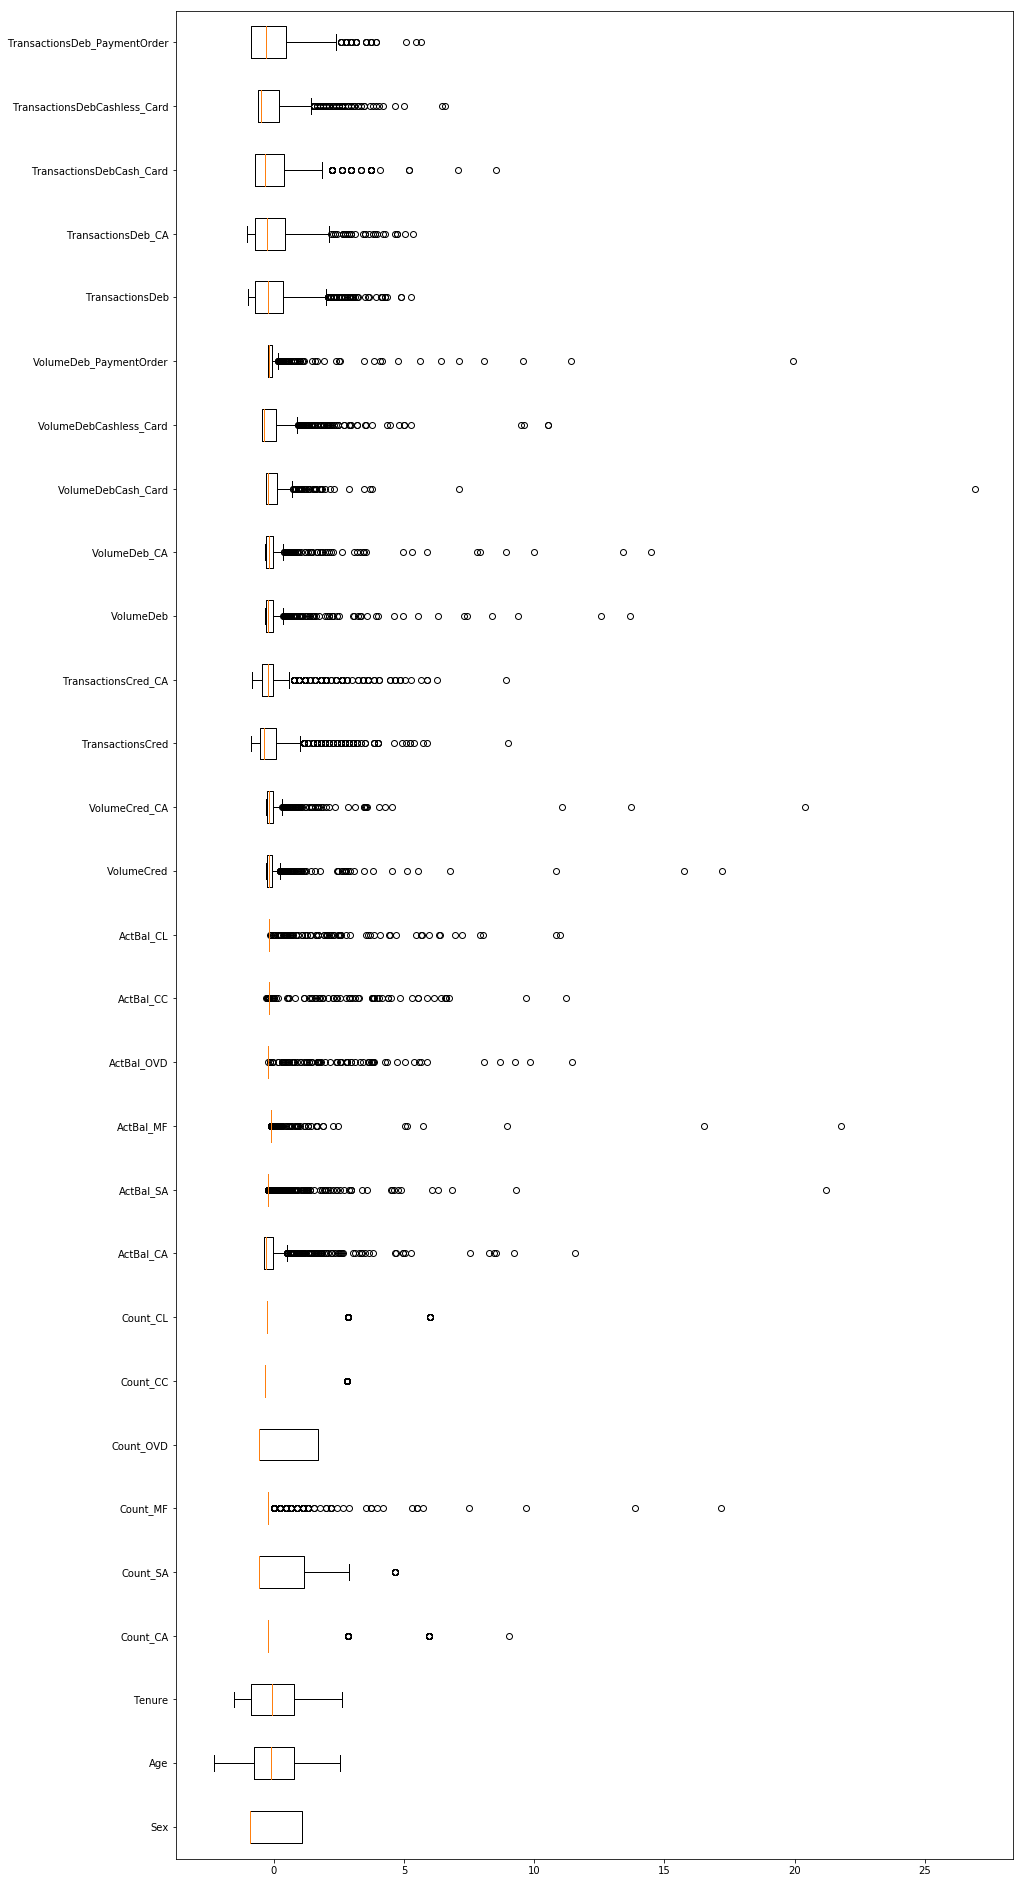

In [ ]:
#Box plot creation
data_bp = data_final.select_dtypes(exclude=['object']).copy()
data_bp2 = data_bp.drop(['Client','Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'], axis=1)
data_scaled = scale(data_bp2 )

# Create a figure instance
fig = plt.figure(1, figsize=(15, 34))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bxlabs=list(data_bp2)

# Create the boxplot
bp = ax.boxplot(data_scaled,labels=bxlabs,showfliers=True,vert=False)
plt.show()

By plotting the boxplot we saw that only 4 features were not concerned by the "outliers issue" : "Tenure","Age", "Count_CC" and "Count_OVD". We did some research and we discovered a technique that could help us to solve this issue.   

### Truncation Function

The truncation function is a method used to handle outliers.

In [ ]:
def truncate(Ys):
    
    Q1 = Ys.quantile(0.25)  #First quartile 
    Q3 = Ys.quantile(0.75)  #Third quartile
    IQR = Q3 - Q1           #Interquartile range
    upper_bound =  Q3 + (1.5 * IQR)    #Upper limit
    lower_bound = Q1 - (1.5 * IQR)       #Lower limit
    
    #Imputing the outliers with upper and lower limit
    value_outlier_Y_up = Ys > upper_bound  
    value_outlier_Y_low = Ys < lower_bound
    outlier_listUB=len(Ys[value_outlier_Y_up])
    outlier_listLB=len(Ys[value_outlier_Y_low])
    if outlier_listUB != 0:
        Ys = Ys.replace([Ys[value_outlier_Y_up]], upper_bound)
    if outlier_listLB != 0:
        Ys = Ys.replace([Ys[value_outlier_Y_low]], lower_bound) 
    
    return Ys

vars_outliers=[ 'Count_CA', 'Count_SA',
                'Count_MF','Count_CL','ActBal_CA','ActBal_SA','ActBal_MF','ActBal_OVD', 'ActBal_CC',
                'ActBal_CL','VolumeCred','VolumeCred_CA','TransactionsCred','TransactionsCred_CA','VolumeDeb','VolumeDeb_CA',
                'VolumeDebCash_Card','VolumeDebCashless_Card','VolumeDeb_PaymentOrder','TransactionsDeb', 'TransactionsDeb_CA',
                'TransactionsDebCash_Card','TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder']
for i in range(0,len(vars_outliers)):
    data_final[vars_outliers[i]]=truncate(data_final[vars_outliers[i]])

Let's create another boxplot after applying the truncation function on the features to be sure that we solved the issue.

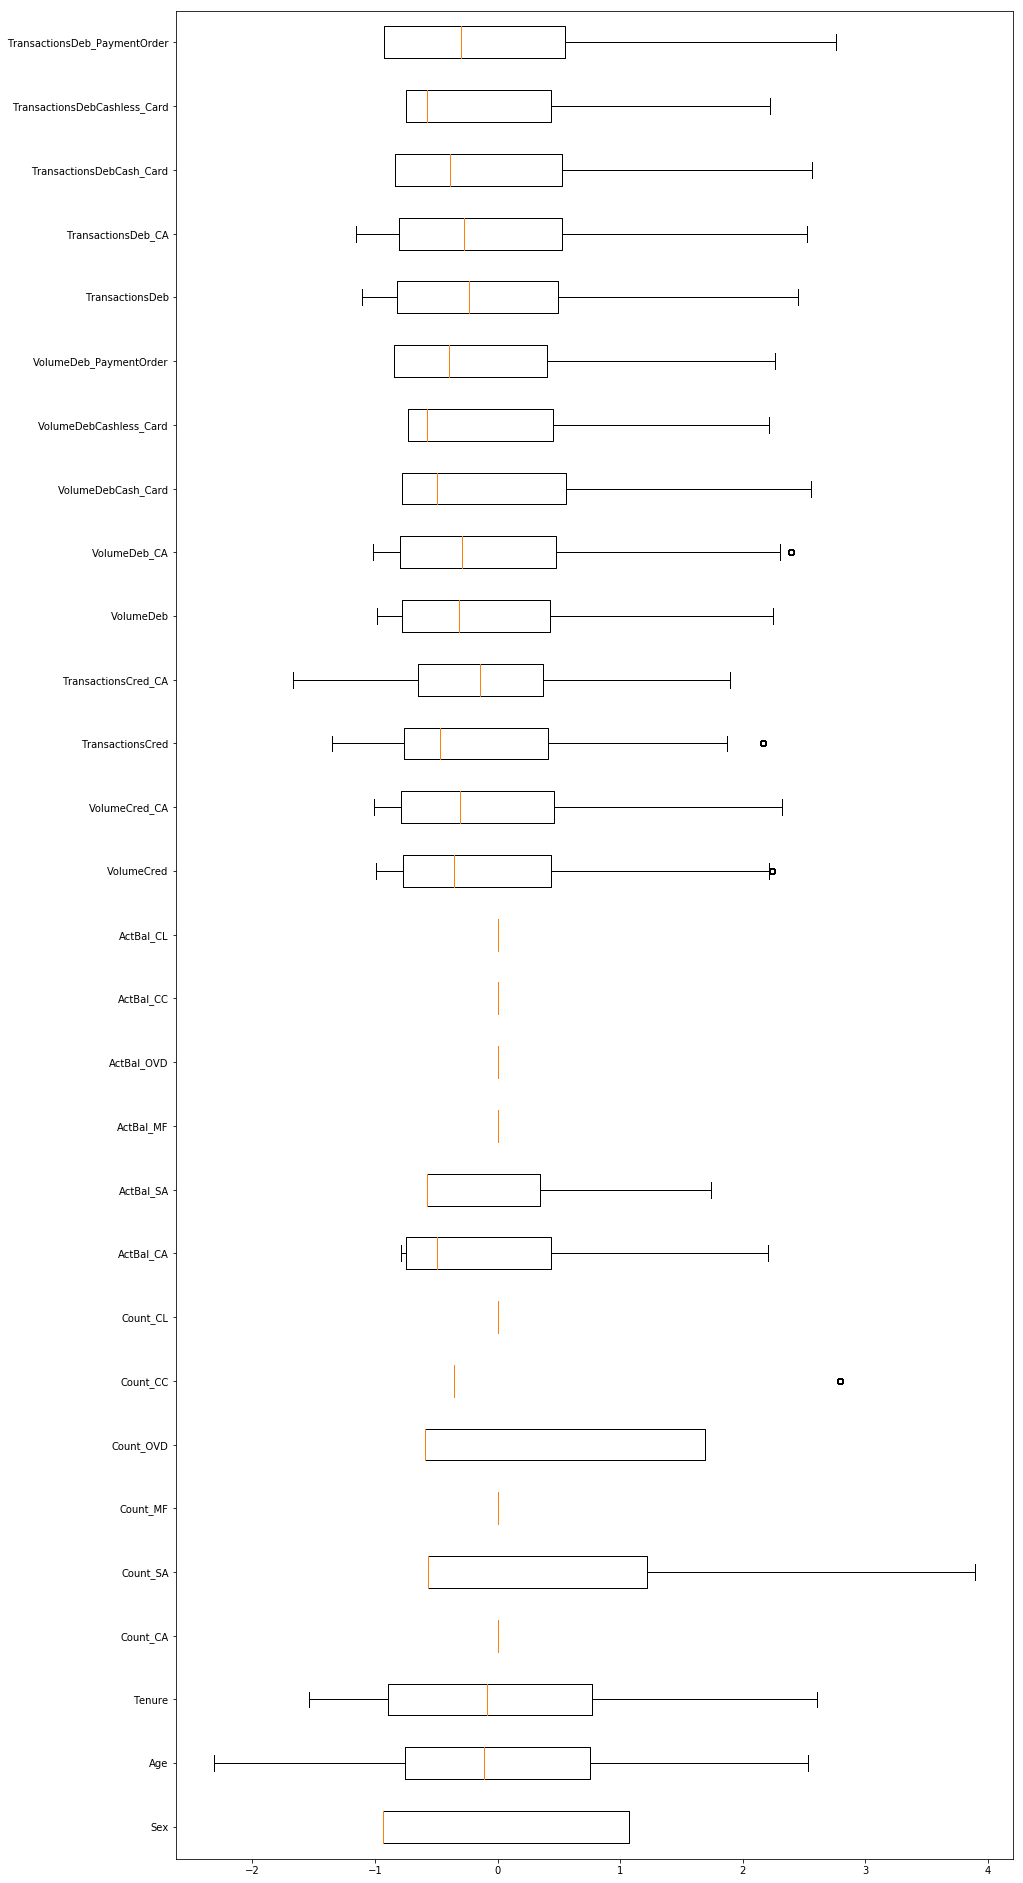

In [ ]:
data_bp = data_final.select_dtypes(exclude=['object']).copy()
data_bp2 = data_bp.drop(['Client','Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'], axis=1)
data_scaled = scale(data_bp2 )

# Create a figure instance
fig = plt.figure(1, figsize=(15, 34))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bxlabs=list(data_bp2)

# Create the boxplot
bp = ax.boxplot(data_scaled,labels=bxlabs,showfliers=True,vert=False)
plt.show()

# III. Building our Model

We structured our data, solved the issues that we had and defined 5 models that could help to find answers to our questions and this for each product offered by the bank.

## First product : Consumer Loan

In [ ]:
data_final["Sale_CL"].value_counts()

0    679
1    290
Name: Sale_CL, dtype: int64

### Select the features 

In [ ]:
CL_X = data_final.loc[:,['Client',"Revenue_CL",'Age','Tenure','ActBal_CA','VolumeCred','VolumeCred_CA','TransactionsCred',
                             'TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','VolumeDebCash_Card','VolumeDebCashless_Card',
                             'VolumeDeb_PaymentOrder','TransactionsDeb','TransactionsDeb_CA','TransactionsDebCash_Card',
                             'TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder']]
CL_Y = data_final["Sale_CL"]
trainCL_X, testCL_X, trainCL_Y, testCL_Y = train_test_split(CL_X, CL_Y, test_size = 0.2, random_state=2)
#Reset indexes
trainCL_X2=pd.DataFrame(trainCL_X.reset_index(drop=True).drop(['Client','Revenue_CL'],axis=1))
testCL_X2=pd.DataFrame(testCL_X.reset_index(drop=True).drop(['Client','Revenue_CL'],axis=1))
trainCL_Y2=trainCL_Y.reset_index(drop=True)
testCL_Y2=testCL_Y.reset_index(drop=True)
#Test Client and Test Revenue
test_clientCL=testCL_X.reset_index(drop=True)['Client']
test_revCL=testCL_X.reset_index(drop=True)['Revenue_CL']

### Logistic Regression

In [ ]:
logreg = LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=2, class_weight=None, random_state=None, solver='lbfgs', max_iter=6000, multi_class='auto', verbose=0, warm_start=True, n_jobs=None, l1_ratio=None)
logreg.fit(trainCL_X2,trainCL_Y2)
print(classification_report(testCL_Y2,logreg.predict(testCL_X2)))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       152
           1       0.55      0.26      0.35        42

    accuracy                           0.79       194
   macro avg       0.69      0.60      0.62       194
weighted avg       0.76      0.79      0.76       194



### Random Forest

In [ ]:
CL_RF = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250,400,500],
    "max_depth":[2,4,8,16,32,None]
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(CL_RF,parameters,cv=5)
cv.fit(trainCL_X2,trainCL_Y2.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 250}


0.677 + or -0.017 for the {'max_depth': 2, 'n_estimators': 5}
0.683 + or -0.014 for the {'max_depth': 2, 'n_estimators': 10}
0.676 + or -0.008 for the {'max_depth': 2, 'n_estimators': 50}
0.677 + or -0.007 for the {'max_depth': 2, 'n_estimators': 100}
0.68 + or -0.007 for the {'max_depth': 2, 'n_estimators': 250}
0.681 + or -0.005 for the {'max_depth': 2, 'n_estimators': 400}
0.679 + or -0.005 for the {'max_depth': 2, 'n_estimators': 500}
0.677 + or -0.032 for the {'max_depth': 4, 'n_estimators': 5}
0.695 + or -0.027 for the {'max_depth': 4, 'n_estimators': 10}
0.697 + or -0.017 for the {'max_depth': 4, 'n_estimators': 50}
0.697 + or -0.021 for the {'max_depth': 4, 'n_estimators': 100}
0.693 + or -0.018 for the {'max_depth': 4, 'n_estimators': 250}
0.695 + or -0.016 for the {'max_depth': 4, 'n_estimators': 400}
0.694 + or -0.013 for the {'max_depth': 4, 'n_estimators': 500}
0.667 + or -0.021 for the {'max_depth': 8, 'n_estima

In [ ]:
CL_RF = RandomForestClassifier(n_estimators=8, criterion='gini', max_depth=500, min_samples_split=5, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=None, random_state=None, verbose=1, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
CL_RF.fit(trainCL_X2,trainCL_Y2)
print(classification_report(testCL_Y2,CL_RF.predict(testCL_X2)))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       152
           1       0.58      0.26      0.36        42

    accuracy                           0.80       194
   macro avg       0.70      0.60      0.62       194
weighted avg       0.77      0.80      0.77       194



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
C:\Users\Jad\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jad\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


### Neural Network Model

In [ ]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 3), random_state=2)
NN.fit(trainCL_X2, trainCL_Y2)
print(classification_report(testCL_Y2,NN.predict(testCL_X2)))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       152
           1       0.50      0.02      0.05        42

    accuracy                           0.78       194
   macro avg       0.64      0.51      0.46       194
weighted avg       0.72      0.78      0.70       194



### Support Vector Machine

In [ ]:
SVM = svm.SVC()
SVM.fit(trainCL_X2, trainCL_Y2)
print(classification_report(testCL_Y2,SVM.predict(testCL_X2)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       152
           1       0.00      0.00      0.00        42

    accuracy                           0.78       194
   macro avg       0.39      0.50      0.44       194
weighted avg       0.61      0.78      0.69       194



C:\Users\Jad\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [ ]:
CL_NBclass=KNeighborsClassifier(n_neighbors=9)
CL_NBclass.fit(trainCL_X2,trainCL_Y2)
print(classification_report(testCL_Y2,CL_NBclass.predict(testCL_X2)))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       152
           1       0.14      0.05      0.07        42

    accuracy                           0.73       194
   macro avg       0.46      0.48      0.46       194
weighted avg       0.64      0.73      0.68       194



### Naive Bayes

In [ ]:
CL_gnb = GaussianNB()
CL_gnb.fit(trainCL_X2, trainCL_Y2)
print(classification_report(testCL_Y2,CL_gnb.predict(testCL_X2)))

### Decision Trees

In [ ]:
CL_DT = tree.DecisionTreeClassifier()
CL_DT = CL_DT.fit(trainCL_X2, trainCL_Y2)
print(classification_report(testCL_Y2,CL_DT.predict(testCL_X2)))

### AUC to define the best model

In [ ]:
print("AUC for logistic model : ",roc_auc_score(testCL_Y2,logreg.predict(testCL_X2)))
print("AUC for random forest : ",roc_auc_score(testCL_Y2,CL_RF.predict(testCL_X2)))
print("AUC for K-nearest neighbours : ",roc_auc_score(testCL_Y2,CL_NBclass.predict(testCL_X2)))
print("AUC for SVM : ",roc_auc_score(testCL_Y2,SVM.predict(testCL_X2)))
print("AUC for Neural Network : ",roc_auc_score(testCL_Y2,NN.predict(testCL_X2)))
print("AUC for Decision Trees : ",roc_auc_score(testCL_Y2,CL_DT.predict(testCL_X2)))
print("AUC for Naive Bayes : ",roc_auc_score(testCL_Y2,CL_gnb.predict(testCL_X2)))

### Using a random forest 

In [ ]:
#Using Clients with above 60% chance of owning a consumer loan
high_probs_CL=CL_RF.predict_proba(testCL_X2)[:,1]>=0.6
probs_CL=CL_RF.predict_proba(testCL_X2)[:,1][high_probs_CL]
#pos_data=data_full_final.loc[:,:][high_probs_CL]
CLRev_Y=test_revCL[high_probs_CL]
CLRev_X=testCL_X2[high_probs_CL]

#Preparing results for expected revenues along with their client ID and probability to own a consumer loan
data={"Exp_RevCL":CLRev_Y,
      "Prob_RevCL":probs_CL,
     "Client":test_clientCL[high_probs_CL]}
Exp_RevCL_df=pd.DataFrame(data, columns=['Client','Prob_RevCL','Exp_RevCL'])

#Selection the top 100 clients with highest propensity to own a consumer loan
CL_Clients_RF =Exp_RevCL_df.sort_values(by=["Prob_RevCL"],ascending=False)[0:100]
CL_Clients_RF

### Using a Logistic Regression 

In [ ]:
#Using Clients with above 60% chance of owning a consumer loan
high_probs_CL=logreg.predict_proba(testCL_X2)[:,1]>=0.6
probs_CL=logreg.predict_proba(testCL_X2)[:,1][high_probs_CL]
#pos_data=data_full_final.loc[:,:][high_probs_CL]
CLRev_Y=test_revCL[high_probs_CL]
CLRev_X=testCL_X2[high_probs_CL]

#Preparing results for expected revenues along with their client ID and probability to own a consumer loan
data={"Exp_RevCL":CLRev_Y,
      "Prob_RevCL":probs_CL,
     "Client":test_clientCL[high_probs_CL]}
Exp_RevCL_df=pd.DataFrame(data, columns=['Client','Prob_RevCL','Exp_RevCL'])

#Selection the top 100 clients with highest propensity to own a consumer loan
CL_Clients_logreg=Exp_RevCL_df.sort_values(by=["Prob_RevCL"],ascending=False)[0:100]
CL_Clients_logreg

### Using a NN model

In [ ]:
#Using Clients with above 60% chance of owning a consumer loan
high_probs_CL=NN.predict_proba(testCL_X2)[:,1]>=0.6
probs_CL=NN.predict_proba(testCL_X2)[:,1][high_probs_CL]
#pos_data=data_full_final.loc[:,:][high_probs_CL]
CLRev_Y=test_revCL[high_probs_CL]
CLRev_X=testCL_X2[high_probs_CL]

#Preparing results for expected revenues along with their client ID and probability to own a consumer loan
data={"Exp_RevCL":CLRev_Y,
      "Prob_RevCL":probs_CL,
     "Client":test_clientCL[high_probs_CL]}
Exp_RevCL_df=pd.DataFrame(data, columns=['Client','Prob_RevCL','Exp_RevCL'])

#Selection the top 100 clients with highest propensity to own a consumer loan
CL_Clients_NN=Exp_RevCL_df.sort_values(by=["Prob_RevCL"],ascending=False)[0:100]
CL_Clients_NN

In [ ]:
print("Number of highly probable clients to have a customer loan : ",len(CL_Clients_RF))

## Second product : Credit Card

In [ ]:
data_final['Sale_CC'].value_counts()

### Selecting the features

In [ ]:
CC_X= data_final.loc[:,['Client','Revenue_CC','Age','Tenure','ActBal_CA','VolumeCred','VolumeCred_CA','TransactionsCred',
                             'TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','VolumeDebCash_Card','VolumeDebCashless_Card',
                             'VolumeDeb_PaymentOrder','TransactionsDeb','TransactionsDeb_CA','TransactionsDebCash_Card',
                             'TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder']]
CC_Y=data_final["Sale_CC"]
trainCC_X, testCC_X, trainCC_Y, testCC_Y = train_test_split(CC_X, CC_Y, test_size = 0.2, random_state=2)
#Reset indexes
trainCC_X2=pd.DataFrame(trainCC_X.reset_index(drop=True).drop(['Client','Revenue_CC'],axis=1))
testCC_X2=pd.DataFrame(testCC_X.reset_index(drop=True).drop(['Client','Revenue_CC'],axis=1))
trainCC_Y2=trainCC_Y.reset_index(drop=True)
testCC_Y2=testCC_Y.reset_index(drop=True)
#Test Client and Test Revenue
test_clientCC=testCC_X.reset_index(drop=True)['Client']
test_revCC=testCC_X.reset_index(drop=True)['Revenue_CC']

### Random Forest

In [ ]:
CC_RF = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250,400,500],
    "max_depth":[2,4,8,16,32,None]
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(CC_RF,parameters,cv=5)
cv.fit(trainCC_X2,trainCC_Y2.values.ravel())

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

In [ ]:
CC_RF = RandomForestClassifier(n_estimators=5, max_depth=2)
CC_RF.fit(trainCC_X2,trainCC_Y2)
print(classification_report(testCC_Y2,CC_RF.predict(testCC_X2)))

### Logistic Regression

In [ ]:
CC_logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=False, intercept_scaling=2, class_weight=None, random_state=None, solver='lbfgs', max_iter=3000, multi_class='auto', verbose=0, warm_start=True, n_jobs=None, l1_ratio=None)
CC_logreg.fit(trainCC_X2,trainCC_Y2)
print(classification_report(testCC_Y2,CC_logreg.predict(testCC_X2)))

### Neural Network

In [ ]:
NN_CC = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 3), random_state=2)
NN_CC.fit(trainCC_X2, trainCC_Y2)
print(classification_report(testCC_Y2,NN_CC.predict(testCC_X2)))

### KNN

In [ ]:
CC_NBclass=KNeighborsClassifier(n_neighbors=7)
CC_NBclass.fit(trainCC_X2,trainCC_Y2)
print(classification_report(testCC_Y2,CC_NBclass.predict(testCC_X2)))

### Naive Bayes

In [ ]:
CC_gnb = GaussianNB()
CC_gnb.fit(trainCC_X2, trainCC_Y2)
print(classification_report(testCC_Y2,CC_gnb.predict(testCC_X2)))

### Decision Trees

In [ ]:
CC_DT = tree.DecisionTreeClassifier()
CC_DT = CC_DT.fit(trainCC_X2, trainCC_Y2)
print(classification_report(testCC_Y2,CC_DT.predict(testCC_X2)))

### AUC to define the best model

In [ ]:
print("AUC for logistic model : ",roc_auc_score(testCC_Y2,CC_logreg.predict(testCC_X2)))
print("AUC for random forest : ",roc_auc_score(testCC_Y2,CC_RF.predict(testCL_X2)))
print("AUC for K-nearest neighbours : ",roc_auc_score(testCC_Y2,CC_NBclass.predict(testCC_X2)))
print("AUC for Neural Network : ",roc_auc_score(testCC_Y2,NN_CC.predict(testCC_X2)))
print("AUC for Decision Trees : ",roc_auc_score(testCC_Y2,CC_DT.predict(testCC_X2)))
print("AUC for Naive Bayes : ",roc_auc_score(testCC_Y2,CC_gnb.predict(testCC_X2)))

### Using NN Model

In [ ]:
high_probs_CC=NN_CC.predict_proba(testCC_X2)[:,1]>=0.6
probs_CC=NN_CC.predict_proba(testCC_X2)[:,1][high_probs_CC]
#CCRev_X=CC_X[high_probs_CC]

#Preparing results for expected revenues along with their client ID and probability to own a credit card
data={"Exp_RevCC":test_revCC[high_probs_CC],
      "Prob_RevCC":probs_CC,
     "Client":test_clientCC[high_probs_CC]}
Exp_RevCC_df=pd.DataFrame(data, columns=['Client','Prob_RevCC','Exp_RevCC'])

#Selection the top 100 clients with highest propensity to own a credit card
CC_Clients_NN=Exp_RevCC_df.sort_values(by="Prob_RevCC" ,ascending=False)
CC_Clients_NN

In [ ]:
print("Number of highly probable clients to have a credit card : ",len(CC_Clients_NN))

### Using Random Forest

## Third Product : Mutual Fund

Selection of features

In [ ]:
MF_X= data_final.loc[:,['Client','Revenue_MF','Age','Tenure','ActBal_CA','VolumeCred','VolumeCred_CA','TransactionsCred',
                             'TransactionsCred_CA','VolumeDeb','VolumeDeb_CA','VolumeDebCash_Card','VolumeDebCashless_Card',
                             'VolumeDeb_PaymentOrder','TransactionsDeb','TransactionsDeb_CA','TransactionsDebCash_Card',
                             'TransactionsDebCashless_Card','TransactionsDeb_PaymentOrder']]
#Selection of target
MF_Y=data_final["Sale_MF"]

#Splitting into train and test set
trainMF_X, testMF_X, trainMF_Y, testMF_Y = train_test_split(MF_X, MF_Y, test_size=0.2, random_state=12)
#skf = StratifiedKFold(n_splits=10, random_state=0)

#Reseting indexes after randomly splitting the data into train and test set
trainMF_X2=pd.DataFrame(trainMF_X.reset_index(drop=True).drop(['Client','Revenue_MF'],axis=1))
testMF_X2=pd.DataFrame(testMF_X.reset_index(drop=True).drop(['Client','Revenue_MF'],axis=1))
trainMF_Y2=trainMF_Y.reset_index(drop=True)
testMF_Y2=testMF_Y.reset_index(drop=True)

#To obtain the client IDs later on from the test set
test_clientMF=testMF_X.reset_index(drop=True)['Client']
test_revMF=testMF_X.reset_index(drop=True)['Revenue_MF']

### Random Forest 

In [ ]:
MF_RF = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250,400,500],
    "max_depth":[2,4,8,16,32,None]
    
}

In [ ]:
cv2 = GridSearchCV(MF_RF,parameters,cv=5)
cv2.fit(trainMF_X2,trainMF_Y2.values.ravel())

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv2)

In [ ]:
MF_RF = RandomForestClassifier(n_estimators=50, max_depth=16)
MF_RF.fit(trainMF_X2,trainMF_Y2)
print(classification_report(testMF_Y2,MF_RF.predict(testMF_X2)))

### Logistic Regression

In [ ]:
logreg_MF = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=False, intercept_scaling=2, class_weight=None, random_state=None, solver='lbfgs', max_iter=500, multi_class='auto', verbose=0, warm_start=True, n_jobs=None, l1_ratio=None)
logreg_MF.fit(trainMF_X2,trainMF_Y2)
print(classification_report(testMF_Y2,logreg_MF.predict(testMF_X2)))

### Neural Network Model 

In [ ]:
NN_MF = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(6, 2), random_state=2)
NN_MF.fit(trainMF_X2, trainMF_Y2)
print(classification_report(testMF_Y2,NN_MF.predict(testMF_X2)))

### KNN 

In [ ]:
MF_NBclass=KNeighborsClassifier(n_neighbors=10)
MF_NBclass.fit(trainMF_X2,trainMF_Y2)
print(classification_report(testMF_Y2,MF_NBclass.predict(testMF_X2)))

### Naive Bayes

In [ ]:
MF_gnb = GaussianNB()
MF_gnb.fit(trainMF_X2, trainMF_Y2)
print(classification_report(testMF_Y2,MF_gnb.predict(testMF_X2)))

### Decision Trees

In [ ]:
MF_DT = tree.DecisionTreeClassifier()
MF_DT = CC_DT.fit(trainMF_X2, trainMF_Y2)
print(classification_report(testMF_Y2,MF_DT.predict(testMF_X2)))

### AUC to define the best model

In [ ]:
print("AUC for logistic model : ",roc_auc_score(testMF_Y2,logreg_MF.predict(testMF_X2)))
print("AUC for random forest : ",roc_auc_score(testMF_Y2,MF_RF.predict(testMF_X2)))
print("AUC for K-nearest neighbours : ",roc_auc_score(testMF_Y2,MF_NBclass.predict(testMF_X2)))
print("AUC for Neural Network : ",roc_auc_score(testMF_Y2,NN_MF.predict(testMF_X2)))
print("AUC for Decision Trees : ",roc_auc_score(testMF_Y2,MF_DT.predict(testMF_X2)))
print("AUC for Naive Bayes : ",roc_auc_score(testMF_Y2,MF_gnb.predict(testMF_X2)))

In [ ]:
high_probs_MF=MF_DT.predict_proba(testMF_X2)[:,1]>=0.6
probs_MF=MF_DT.predict_proba(testMF_X2)[:,1][high_probs_MF]
#CCRev_X=CC_X[high_probs_CC]

#Preparing results for expected revenues along with their client ID and probability to own a credit card
data={"Exp_RevMF":test_revMF[high_probs_MF],
      "Prob_RevMF":probs_MF,
     "Client":test_clientMF[high_probs_MF]}
Exp_RevMF_df=pd.DataFrame(data, columns=['Client','Prob_RevMF','Exp_RevMF'])

#Selection the top 100 clients with highest propensity to own a credit card
MF_Clients_DT=Exp_RevMF_df.sort_values(by="Prob_RevMF" ,ascending=False)
MF_Clients_DT

In [ ]:
print("Number of highly probable clients to have a mutual fund : ",len(MF_Clients_DT))

### Target Clients  

In [ ]:
#Summary of each client with and without a product
CLCC_Clients=pd.merge(CL_Clients_RF,CC_Clients_NN,on='Client',how='outer')
Target=pd.merge(CLCC_Clients,MF_Clients_DT,on='Client',how='outer')
Target.loc[:,["Client","Exp_RevCL","Exp_RevCC","Exp_RevMF"]]

In [ ]:
len(Target)

In [ ]:
#Summary of expected revenues per product
Target.loc[:,["Exp_RevCL","Exp_RevCC","Exp_RevMF"]].sum(axis = 0, skipna = True)

In [ ]:
Target.loc[:,["Client","Exp_RevCL","Exp_RevCC","Exp_RevMF"]].to_csv("C:/Users/Jad\Desktop/contact_clients.csv")